# ANALYSIS OF RENT ACCOMODATION PRICES IN PORTO

## Import libraries

In [33]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda

In [123]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


## Data loading

In [179]:
data = pd.read_csv('listings.csv')
data = data[data.neighbourhood_group == 'PORTO']
data = data[data.room_type == 'Entire home/apt']
data = data[data.number_of_reviews > 130]
data = data[data.availability_365 > 320]
data = data.set_index('last_review').filter(like='2020-10', axis=0)
data = data.reset_index(drop=True)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,579745,Airy & Modern Beachfront Apartment,2851799,Maria C,PORTO,"Aldoar, Foz do Douro e Nevogilde",41.15384,-8.67886,Entire home/apt,75,2,260,2.59,1,341
1,619218,Kitchnette Studio in Porto's Downtown,1651078,Lurdes,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15448,-8.61451,Entire home/apt,25,2,395,3.98,5,358
2,621980,Kitchnette Studio in Porto's Downtown II,1651078,Lurdes,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15448,-8.61451,Entire home/apt,25,2,417,4.18,5,365
3,738602,Clérigos Downtown - Historic Center,2220420,Tomás,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14581,-8.61272,Entire home/apt,67,2,323,3.32,4,338
4,870040,Back-to-Back House I - City Centre,4585046,Rui,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15117,-8.61461,Entire home/apt,31,2,326,3.63,2,335
5,1072112,Vitória 392 - Central Loft,5897201,Marco,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14204,-8.61797,Entire home/apt,39,2,446,4.90,17,332
6,1264015,NERVO Apartment,6492034,Bruno,PORTO,Bonfim,41.14447,-8.59764,Entire home/apt,40,2,439,4.96,1,341
7,1288357,Vitória - Central and Rustic Studio,5897201,Marco,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14414,-8.61563,Entire home/apt,36,2,376,4.22,17,353
8,1307418,Beautiful River View Studio For 2!,2728741,Innvict,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14068,-8.61642,Entire home/apt,45,1,260,2.96,7,365
9,1476656,Studio with terrace @ historic centre,504285,Raul,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14445,-8.61753,Entire home/apt,49,3,352,4.01,3,357


## Data introduction

In [168]:
data_clean_induction = data[['name', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'price', 'number_of_reviews']]
data_clean_induction

,name,host_name,neighbourhood,latitude,longitude,price,number_of_reviews
0,Airy & Modern Beachfront Apartment,Maria C,"Aldoar, Foz do Douro e Nevogilde",41.15384,-8.67886,75,260
1,Kitchnette Studio in Porto's Downtown,Lurdes,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15448,-8.61451,25,395
2,Kitchnette Studio in Porto's Downtown II,Lurdes,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15448,-8.61451,25,417
3,Clérigos Downtown - Historic Center,Tomás,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14581,-8.61272,67,323
4,Back-to-Back House I - City Centre,Rui,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15117,-8.61461,31,326
5,Vitória 392 - Central Loft,Marco,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14204,-8.61797,39,446
6,NERVO Apartment,Bruno,Bonfim,41.14447,-8.59764,40,439
7,Vitória - Central and Rustic Studio,Marco,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14414,-8.61563,36,376
8,Beautiful River View Studio For 2!,Innvict,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14068,-8.61642,45,260
9,Studio with terrace @ historic centre,Raul,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14445,-8.61753,49,352


In [180]:
data_clean = data[['neighbourhood', 'host_name', 'latitude', 'longitude', 'price']]
data_clean

,neighbourhood,host_name,latitude,longitude,price
0,"Aldoar, Foz do Douro e Nevogilde",Maria C,41.15384,-8.67886,75
1,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Lurdes,41.15448,-8.61451,25
2,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Lurdes,41.15448,-8.61451,25
3,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Tomás,41.14581,-8.61272,67
4,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Rui,41.15117,-8.61461,31
5,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Marco,41.14204,-8.61797,39
6,Bonfim,Bruno,41.14447,-8.59764,40
7,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Marco,41.14414,-8.61563,36
8,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Innvict,41.14068,-8.61642,45
9,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Raul,41.14445,-8.61753,49


In [181]:
data1 = data.groupby('neighbourhood').count()
data1

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,,,,,
"Aldoar, Foz do Douro e Nevogilde",1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bonfim,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Campanhã,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória",131,131,131,131,131,131,131,131,131,131,131,131,131,131
Lordelo do Ouro e Massarelos,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Paranhos,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Lets sort by price and visualize most popular neighbourhoods

## Analysis of data

In [182]:
gr = data_clean.groupby('host_name').mean()
gr = gr.reset_index()
gr

,host_name,latitude,longitude,price
0,Abel,41.165780,-8.600060,35.000000
1,Adelio,41.152010,-8.613900,28.000000
2,Alexandra,41.147940,-8.614210,45.000000
3,Alexandra & Nuno,41.150210,-8.613110,45.000000
4,Aline,41.141950,-8.613610,40.000000
5,Ana,41.145784,-8.611212,66.200000
6,Ana & João,41.149850,-8.595025,39.500000
7,Ana E Rui,41.153210,-8.608980,23.000000
8,Ana Luísa,41.154700,-8.624600,30.000000
9,Andreia,41.145750,-8.610557,26.666667


In [269]:
hist = data[['neighbourhood', 'price']]
hist = hist.groupby('neighbourhood').mean()
hist = hist.sort_values('price', ascending=False)
hist

,price
neighbourhood,
"Aldoar, Foz do Douro e Nevogilde",75.000000
Lordelo do Ouro e Massarelos,63.166667
"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória",41.129771
Bonfim,37.944444
Paranhos,36.500000
Campanhã,29.000000


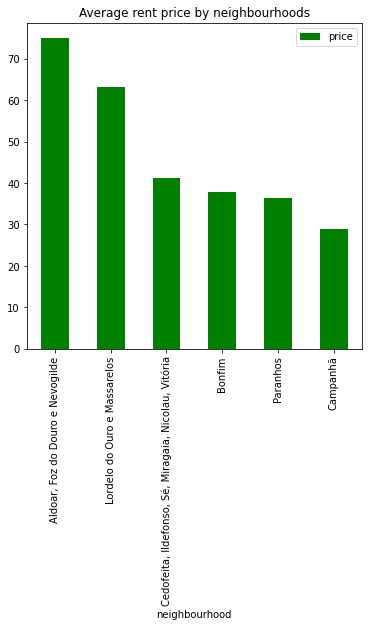

In [270]:
hist.plot(kind='bar', figsize=(6, 6), color='green')
plt.title('Average rent price by neighbourhoods') # add title to the plot
plt.show()

## Foursquare API

In [191]:
CLIENT_ID = '4JAWT50D3AMFUO5V3U4FG1ZWHXHC3V3H4J3DVTMXBXT00OS2'
CLIENT_SECRET = '5LE4RS3K3PAOVGWIZEVO3CVLOTRWPLZGHT3XY3FP0YNX0BG4'
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4JAWT50D3AMFUO5V3U4FG1ZWHXHC3V3H4J3DVTMXBXT00OS2
CLIENT_SECRET:5LE4RS3K3PAOVGWIZEVO3CVLOTRWPLZGHT3XY3FP0YNX0BG4


In [189]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [192]:
porto_venues = getNearbyVenues(names=gr['host_name'],
                                   latitudes=gr['latitude'],
                                   longitudes=gr['longitude']
                                  )

Abel
Adelio
Alexandra
Alexandra & Nuno
Aline
Ana
Ana & João
Ana E Rui
Ana Luísa
Andreia
André
Bruno
Carla
Carlos E Rui
Carolina
Catarina
Celia
Cláudia
Cláudia & José
Cristina
Cristina & Luís
Daniela
Dayanador
Deolinda
Dixo'S
Douro
DouroApartment
Duque De Loule
ESM Rental
Fernando Salvador
Filipa
Filipe
Fine Living Oporto
Francisco
Francisco & Maria
Francisco E Margarida
Fátima
Gabriela & Carina
Ghulam
Graciete E
Guido
Guy
Helena
Henri
Henrique
Innvict
Inês
Isabel
Joana
Joana & Diogo
Joao
Joaquim
Jorge
Josefa
José
João
Kurt & Teresa
Looking
Lurdes
Luís
Manuela
Marcia
Marco
Maria
Maria Amélia
Maria C
Maria E Rui
Maria Manuel
Mario
Marisa & Mário
Marta
Mathieu
Miguel
Mário
Nuno
Nuno & Raquel
Olga
Oporto Rental Management
Passos Manuel 236 AL
Paulo
Pedro
Raul
Roxanne E Joao
Rui
Sandra
Silveiras Lofts
Silvia & Edu
Susana
Susete
Sónia
Teresa
The Porto
Tiago
Tomás
Vania


In [193]:
porto_onehot = pd.get_dummies(porto_venues[['Venue Category']], prefix="", prefix_sep="")
porto_onehot['Neighbourhood'] = porto_venues['Neighbourhood'] 
fixed_columns = [porto_onehot.columns[-1]] + list(porto_onehot.columns[:-1])
porto_onehot = porto_onehot[fixed_columns]
porto_onehot.head()

,Neighbourhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Cable Car,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dive Bar,Dutch Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Space,Fast Food Restaurant,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General College & University,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Heliport,Historic Site,History Museum,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Laundromat,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Museum,Music Venue,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pier,Pizza Place,Platform,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tea Room,Theater,Theme Restaurant,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery
0,Abel,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abel,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Abel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [194]:
porto_grouped = porto_onehot.groupby('Neighbourhood').mean().reset_index()
porto_grouped

,Neighbourhood,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Cable Car,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dive Bar,Dutch Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Space,Fast Food Restaurant,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Frozen Yogurt Shop,Garden,Gas Station,Gastropub,General College & University,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Heliport,Historic Site,History Museum,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Karaoke Bar,Laundromat,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Museum,Music Venue,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Organic Grocery,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pier,Pizza Place,Platform,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Syrian Restaurant,Tapas Restaurant,Taverna,Tea Room,Theater,Theme Restaurant,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery
0,Abel,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.000000,0.230769,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000
1,Adelio,0.000000,0.000000,0.012048,0.000000,0.012048,0.00000,0.000000,0.012048,0.000000,0.000000,0.024096,0.084337,0.0000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.024096,0.000000,0.000000,0.036145,0.000000,0.000000,0.084337,0.000000,0.012048,0.012048,0.000000,0.000000,0.000000,0.012048,0.024096,0.036145,0.000000,0.00000,0.000000,0.00,0.012048,0.000000,0.000000,0.0

In [195]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [237]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = porto_grouped['Neighbourhood']

for ind in np.arange(porto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(porto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abel,Bakery,Café,Hockey Arena,Park,Paper / Office Supplies Store,Playground,Chinese Restaurant,BBQ Joint,Supermarket,Winery
1,Adelio,Portuguese Restaurant,Café,Bar,Restaurant,Coffee Shop,Burger Joint,Plaza,Hostel,Bakery,Modern European Restaurant
2,Alexandra,Bar,Portuguese Restaurant,Hostel,Plaza,Café,Tapas Restaurant,Restaurant,Sandwich Place,Ice Cream Shop,Wine Bar
3,Alexandra & Nuno,Portuguese Restaurant,Bar,Plaza,Café,Hotel,Ice Cream Shop,Pizza Place,Burger Joint,Restaurant,Cocktail Bar
4,Aline,Portuguese Restaurant,Tapas Restaurant,Plaza,Café,Restaurant,Scenic Lookout,Bar,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop
5,Ana,Portuguese Restaurant,Plaza,Hostel,Coffee Shop,Ice Cream Shop,Tapas Restaurant,Scenic Lookout,Bar,Italian Restaurant,Café
6,Ana & João,Portuguese Restaurant,Hotel,Café,Restaurant,Plaza,Metro Station,Coffee Shop,Hostel,Supermarket,Dance Studio
7,Ana E Rui,Portuguese Restaurant,Café,Hostel,Hotel,Grocery Store,Restaurant,Tapas Restaurant,Bar,Gastropub,Indie Movie Theater
8,Ana Luísa,Café,Hotel,Italian Restaurant,Seafood Restaurant,Portuguese Restaurant,Bakery,Sandwich Place,Shopping Mall,Restaurant,Pizza Place
9,Andreia,Portuguese Restaurant,Ice Cream Shop,Plaza,Hostel,Coffee Shop,Café,Tapas Restaurant,Bar,Italian Restaurant,Clothing Store


## Clustering

k searching

In [201]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(porto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

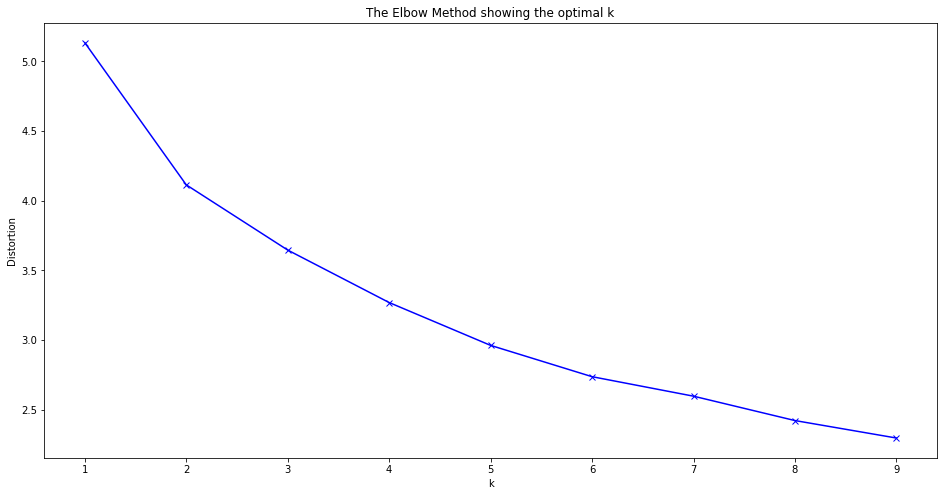

In [202]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Model

In [235]:
kclusters = 3
porto_grouped_clustering = porto_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(porto_grouped_clustering)
kmeans.labels_

array([2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2,
       0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 2, 2, 1, 1, 1, 2])

In [238]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
porto_merged = gr
porto_merged = porto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='host_name')
porto_merged

,host_name,latitude,longitude,price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abel,41.165780,-8.600060,35.000000,2,Bakery,Café,Hockey Arena,Park,Paper / Office Supplies Store,Playground,Chinese Restaurant,BBQ Joint,Supermarket,Winery
1,Adelio,41.152010,-8.613900,28.000000,1,Portuguese Restaurant,Café,Bar,Restaurant,Coffee Shop,Burger Joint,Plaza,Hostel,Bakery,Modern European Restaurant
2,Alexandra,41.147940,-8.614210,45.000000,1,Bar,Portuguese Restaurant,Hostel,Plaza,Café,Tapas Restaurant,Restaurant,Sandwich Place,Ice Cream Shop,Wine Bar
3,Alexandra & Nuno,41.150210,-8.613110,45.000000,1,Portuguese Restaurant,Bar,Plaza,Café,Hotel,Ice Cream Shop,Pizza Place,Burger Joint,Restaurant,Cocktail Bar
4,Aline,41.141950,-8.613610,40.000000,0,Portuguese Restaurant,Tapas Restaurant,Plaza,Café,Restaurant,Scenic Lookout,Bar,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop
5,Ana,41.145784,-8.611212,66.200000,1,Portuguese Restaurant,Plaza,Hostel,Coffee Shop,Ice Cream Shop,Tapas Restaurant,Scenic Lookout,Bar,Italian Restaurant,Café
6,Ana & João,41.149850,-8.595025,39.500000,2,Portuguese Restaurant,Hotel,Café,Restaurant,Plaza,Metro Station,Coffee Shop,Hostel,Supermarket,Dance Studio
7,Ana E Rui,41.153210,-8.608980,23.000000,2,Portuguese Restaurant,Café,Hostel,Hotel,Grocery Store,Restaurant,Tapas Restaurant,Bar,Gastropub,Indie Movie Theater
8,Ana Luísa,41.154700,-8.624600,30.000000,2,Café,Hotel,Italian Restaurant,Seafood Restaurant,Portuguese Restaurant,Bakery,Sandwich Place,Shopping Mall,Restaurant,Pizza Place
9,Andreia,41.145750,-8.610557,26.666667,1,Portuguese Restaurant,Ice Cream Shop,Plaza,Hostel,Coffee Shop,Café,Tapas Restaurant,Bar,Italian Restaurant,Clothing Store


In [288]:
porto_hist = porto_merged[['Cluster Labels', '1st Most Common Venue']]
porto_hist['C'] = '1'
porto_hist

<ipython-input-288-f08cbc524eea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porto_hist['C'] = '1'


,Cluster Labels,1st Most Common Venue,C
0,2,Bakery,1
1,1,Portuguese Restaurant,1
2,1,Bar,1
3,1,Portuguese Restaurant,1
4,0,Portuguese Restaurant,1
5,1,Portuguese Restaurant,1
6,2,Portuguese Restaurant,1
7,2,Portuguese Restaurant,1
8,2,Café,1
9,1,Portuguese Restaurant,1


In [289]:
porto_hist = pd.pivot_table(porto_hist, index='Cluster Labels', columns='1st Most Common Venue', aggfunc='count')
porto_hist

C                                                 \
1st Most Common Venue Bakery  Bar Café Coffee Shop Cupcake Shop Hotel Plaza   
Cluster Labels                                                                
0                        NaN  NaN  NaN         NaN          NaN   NaN   NaN   
1                        NaN  8.0  2.0         NaN          NaN   1.0   1.0   
2                        1.0  NaN  9.0         1.0          1.0   3.0   NaN   

                                                                         
1st Most Common Venue Portuguese Restaurant Restaurant Tapas Restaurant  
Cluster Labels                                                           
0                                      16.0        NaN              NaN  
1                                      32.0        NaN              3.0  
2                                      14.0        3.0              NaN

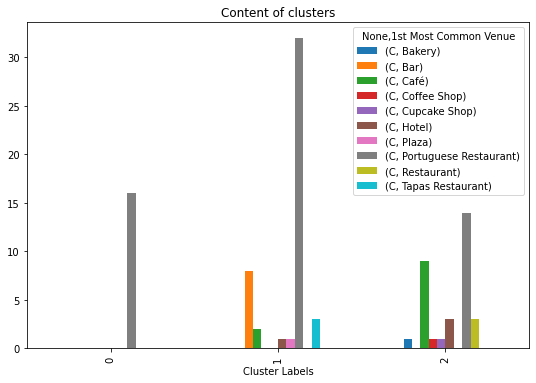

In [295]:
porto_hist.plot(kind='bar', figsize=(9, 6))
plt.title('Content of clusters')
plt.show()

## Visualization

In [240]:
address = 'Porto'
geolocator = Nominatim(user_agent="porto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [302]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(porto_merged['latitude'], porto_merged['longitude'], porto_merged['host_name'], porto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Choropleth map

In [297]:
ch = data_clean[['longitude', 'price']]
ch

,longitude,price
0,-8.67886,75
1,-8.61451,25
2,-8.61451,25
3,-8.61272,67
4,-8.61461,31
5,-8.61797,39
6,-8.59764,40
7,-8.61563,36
8,-8.61642,45
9,-8.61753,49


In [165]:
ch = ch.append({'longitude': -8.595318, 'price': 75}, ignore_index=True)
ch = ch.append({'longitude': -8.662269, 'price': 90}, ignore_index=True)
ch = ch.tail(2)
ch

,longitude,price
257,-8.595318,75.0
258,-8.662269,90.0


In [136]:
world_geo = r'porto.geojson'

In [303]:
map_clusters.choropleth(
    geo_data=world_geo,
    data=ch,
    columns=['longitude', 'price'],
    key_on='feature.coordinates',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.1,
    
    legend_name='Price'
)

map_clusters